# üìä Tip Tahmini i√ßin Veri Analizi ve Modelleme

## Bu √ßalƒ±≈ümada, restoran bah≈üi≈ü veri seti √ºzerinde veri analizi, g√∂rselle≈ütirme, √∂n i≈üleme ve modelleme adƒ±mlarƒ± ger√ßekle≈ütirilmi≈ütir. A≈üaƒüƒ±da bu s√ºre√ßte izlenen adƒ±mlar √∂zetlenmi≈ütir:

### 1. üì• Veri Y√ºkleme ve ƒ∞nceleme:
Veri Seti: Kaggle √ºzerindeki The Waiter's Tip data seti kullanƒ±ldƒ±. üçΩÔ∏è

Ama√ß: Verinin yapƒ±sƒ±nƒ± anlamak i√ßin veri seti incelendi ve temel istatistiksel bilgiler g√∂zden ge√ßirildi. üîç

### 2. üîß Veri √ñn ƒ∞≈üleme:
Kategorik Deƒüi≈ükenlerin Kodlanmasƒ±:

Label Encoding: sex deƒüi≈ükeni, LabelEncoder kullanƒ±larak erkekler i√ßin 1, kadƒ±nlar i√ßin 0 olacak ≈üekilde kodlandƒ±. üë®‚Äç‚öïÔ∏èüë©‚Äç‚öïÔ∏è
One-Hot Encoding: smoker, day, ve time deƒüi≈ükenleri one-hot encoding y√∂ntemiyle binary (ikili) deƒüi≈ükenlere d√∂n√º≈üt√ºr√ºld√º. üö¨üìÖ‚è∞
### 3. üîç Ke≈üifsel Veri Analizi (EDA):
Korelasyon Matrisi: Veri setindeki deƒüi≈ükenler arasƒ±ndaki korelasyonlarƒ± incelemek i√ßin korelasyon matrisi hesaplandƒ± ve heatmap ile g√∂rselle≈ütirildi. üå°Ô∏è

Veri G√∂rselle≈ütirme: Daƒüƒ±lƒ±m grafikleri ve diƒüer g√∂rselle≈ütirmeler ile deƒüi≈ükenler arasƒ± ili≈ükiler analiz edildi. üìàüìâ

### 4. üßë‚Äçüî¨ Modelleme:
Linear Regression: ƒ∞lk olarak, temel bir lineer regresyon modeli kurularak bah≈üi≈ü (tip) tahminleri yapƒ±ldƒ±. Modelin performansƒ± MSE ve R¬≤ skorlarƒ± ile deƒüerlendirildi. üìâüîç

√áapraz Doƒürulama: Modelin genelleme yeteneƒüini deƒüerlendirmek i√ßin k-fold √ßapraz doƒürulama yapƒ±ldƒ±. üîÑ

XGBoost: Ek olarak, XGBoost modeli ile tahminler ger√ßekle≈ütirildi ve Linear Regression modeli ile kar≈üƒ±la≈ütƒ±rma yapƒ±ldƒ±. üåüüìä

### 5. üìù Sonu√ßlar ve Deƒüerlendirme:
Performans Kar≈üƒ±la≈ütƒ±rmasƒ±: Linear Regression ve XGBoost modellerinin performanslarƒ± kar≈üƒ±la≈ütƒ±rƒ±ldƒ±, MSE ve R¬≤ skorlarƒ± analiz edildi. ‚öñÔ∏è

ƒ∞yile≈ütirme √ñnerileri: Modelin performansƒ±nƒ± artƒ±rmak i√ßin ileriye y√∂nelik √∂neriler sunuldu. üöÄ


## √ñncelikle gerekli k√ºt√ºphanelerimizi y√ºkl√ºyoruz ve import ediyoruz

In [1]:
!pip install researchpy
!pip install xgboost

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import researchpy as rp 
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor

  Obtaining dependency information for researchpy from https://files.pythonhosted.org/packages/f2/3a/f89796ede409890a27612c6e27d21bb65763bb7c034cd36d7577abe3edbf/researchpy-0.3.6-py3-none-any.whl.metadata
  Obtaining dependency information for statsmodels from https://files.pythonhosted.org/packages/33/35/46c3dcd04bb6813e766ad209ac35ab6fe30d3cb426a6ce47be0b8748a1f5/statsmodels-0.14.3-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for patsy from https://files.pythonhosted.org/packages/43/f3/1d311a09c34f14f5973bb0bb0dc3a6e007e1eda90b5492d082689936ca51/patsy-0.5.6-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/233.9 kB ? eta -:--:--
   ---------- ----------------------------- 61.4/233.9 kB 1.1 MB/s eta 0:00:01
   ----------------------------- ---------- 174.1/233.9 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 233.9/233.9 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
df = pd.read_csv('tips.csv')

## Veri Setimize ilk bakƒ±≈üƒ±mƒ±zƒ± yapƒ±yoruz. Verileri ve verilerin yapƒ±sƒ±nƒ± inceliyoruz.

In [4]:
df.head(10)

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
5       25.29  4.71    Male     No  Sun  Dinner     4
6        8.77  2.00    Male     No  Sun  Dinner     2
7       26.88  3.12    Male     No  Sun  Dinner     4
8       15.04  1.96    Male     No  Sun  Dinner     2
9       14.78  3.23    Male     No  Sun  Dinner     2

In [4]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [5]:
df.describe()

total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000

In [6]:
df.shape

(244, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


## Verilerin birbiri ile olan ili≈ükilerini ve daƒüƒ±lƒ±mlarƒ±nƒ± inceliyoruz

In [8]:
df.groupby("day")["tip"].sum()

day
Fri      51.96
Sat     260.40
Sun     247.39
Thur    171.83
Name: tip, dtype: float64

In [9]:
df.groupby("day").agg({"tip": "sum","total_bill":"sum"})

tip  total_bill
day                     
Fri    51.96      325.88
Sat   260.40     1778.40
Sun   247.39     1627.16
Thur  171.83     1096.33

In [10]:
df.groupby(['day', 'time']).agg({'total_bill': 'sum',"tip": "sum"})

total_bill     tip
day  time                      
Fri  Dinner      235.96   35.28
     Lunch        89.92   16.68
Sat  Dinner     1778.40  260.40
Sun  Dinner     1627.16  247.39
Thur Dinner       18.78    3.00
     Lunch      1077.55  168.83

In [11]:
# Bah≈üi≈üin genel hesaba oranƒ±na bakƒ±yoruz
df["tip/total_bill"]=df["tip"]/df["total_bill"]

In [12]:
df.head(10)

total_bill   tip     sex smoker  day    time  size  tip/total_bill
0       16.99  1.01  Female     No  Sun  Dinner     2        0.059447
1       10.34  1.66    Male     No  Sun  Dinner     3        0.160542
2       21.01  3.50    Male     No  Sun  Dinner     3        0.166587
3       23.68  3.31    Male     No  Sun  Dinner     2        0.139780
4       24.59  3.61  Female     No  Sun  Dinner     4        0.146808
5       25.29  4.71    Male     No  Sun  Dinner     4        0.186240
6        8.77  2.00    Male     No  Sun  Dinner     2        0.228050
7       26.88  3.12    Male     No  Sun  Dinner     4        0.116071
8       15.04  1.96    Male     No  Sun  Dinner     2        0.130319
9       14.78  3.23    Male     No  Sun  Dinner     2        0.218539

In [13]:
df[["tip","total_bill"]].cov()

tip  total_bill
tip         1.914455    8.323502
total_bill  8.323502   79.252939

In [14]:
df[["tip","total_bill"]].corr()

tip  total_bill
tip         1.000000    0.675734
total_bill  0.675734    1.000000

In [15]:
rp.summary_cat(df[["sex","smoker","day"]])

Variable Outcome  Count  Percent
0      sex    Male    157    64.34
1           Female     87    35.66
2   smoker      No    151    61.89
3              Yes     93    38.11
4      day     Sat     87    35.66
5              Sun     76    31.15
6             Thur     62    25.41
7              Fri     19     7.79

In [16]:
rp.summary_cat(df[["sex","time","day"]])

Variable Outcome  Count  Percent
0      sex    Male    157    64.34
1           Female     87    35.66
2     time  Dinner    176    72.13
3            Lunch     68    27.87
4      day     Sat     87    35.66
5              Sun     76    31.15
6             Thur     62    25.41
7              Fri     19     7.79

In [17]:
rp.summary_cont(df[["total_bill","tip","size"]])

/opt/conda/lib/python3.10/site-packages/researchpy/summary.py:102: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'total_bill' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table_a.iloc[0,0] = ix
/opt/conda/lib/python3.10/site-packages/researchpy/summary.py:102: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'tip' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table_a.iloc[0,0] = ix
/opt/conda/lib/python3.10/site-packages/researchpy/summary.py:102: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'size' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table_a.iloc[0,0] = ix


Variable      N     Mean      SD      SE  95% Conf.  Interval
0  total_bill  244.0  19.7859  8.9024  0.5699    18.6633   20.9086
1         tip  244.0   2.9983  1.3836  0.0886     2.8238    3.1728
2        size  244.0   2.5697  0.9511  0.0609     2.4497    2.6896

## Verileri daha iyi anlamak i√ßin verileri g√∂rselle≈ütiriyoruz

<Axes: xlabel='sex', ylabel='total_bill'>

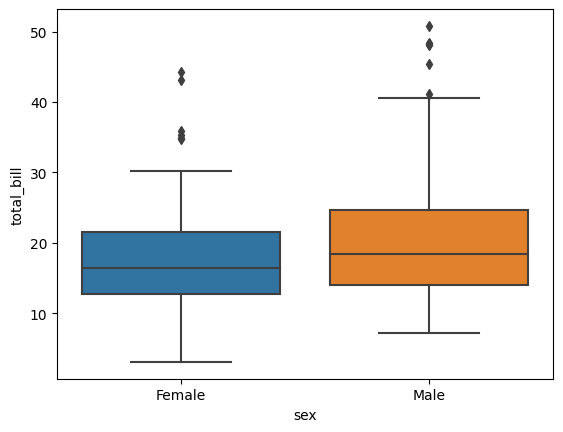

In [18]:
sns.boxplot(x="sex",y="total_bill",data=df)

Cinsiyet Bazƒ±nda Ortalama Bah≈üi≈ü Miktarlarƒ±:
sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64


/tmp/ipykernel_17/3718939607.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='sex', y='tip', data=df, ci=None, palette="Blues_d")


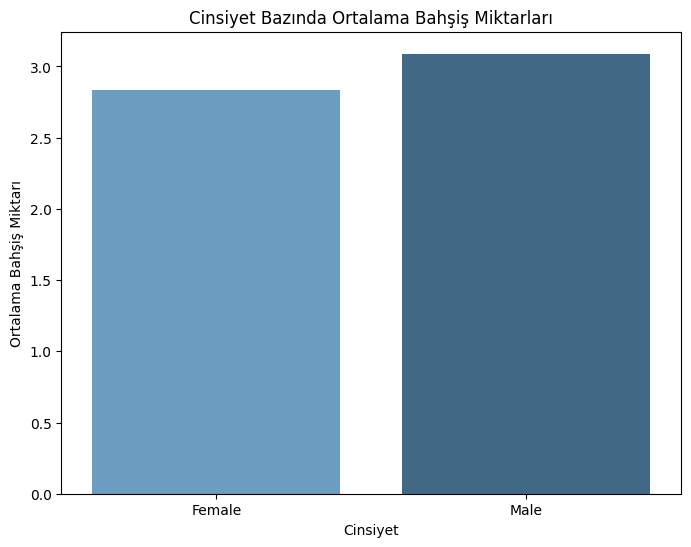

In [19]:
avg_tip_by_sex = df.groupby('sex')['tip'].mean()
print("Cinsiyet Bazƒ±nda Ortalama Bah≈üi≈ü Miktarlarƒ±:")
print(avg_tip_by_sex)

plt.figure(figsize=(8, 6))
sns.barplot(x='sex', y='tip', data=df, ci=None, palette="Blues_d")
plt.title('Cinsiyet Bazƒ±nda Ortalama Bah≈üi≈ü Miktarlarƒ±')
plt.xlabel('Cinsiyet')
plt.ylabel('Ortalama Bah≈üi≈ü Miktarƒ±')
plt.show()

<Axes: xlabel='smoker', ylabel='total_bill'>

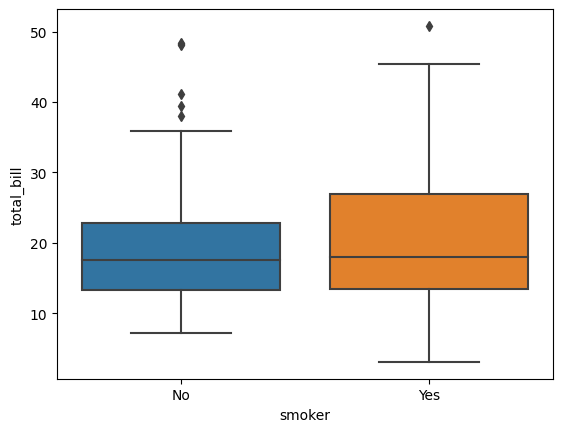

In [20]:
sns.boxplot(x="smoker",y="total_bill",data=df)

<Axes: xlabel='smoker', ylabel='tip'>

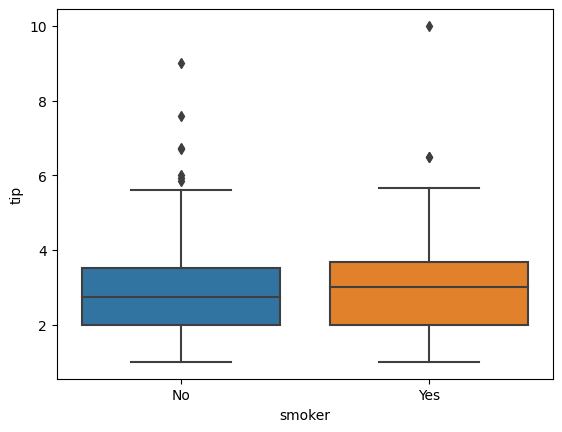

In [21]:
sns.boxplot(x="smoker",y="tip",data=df)

In [22]:
df['tip_percentage']=df['tip/total_bill']*100

In [23]:
avg_tip_percentage_by_smoker = df.groupby('smoker')['tip_percentage'].mean()
print(avg_tip_percentage_by_smoker)

smoker
No     15.932846
Yes    16.319604
Name: tip_percentage, dtype: float64


In [24]:
no_smoker_tips = df[df['smoker'] == 'No']['tip_percentage']
yes_smoker_tips = df[df['smoker'] == 'Yes']['tip_percentage']

t_stat, p_value = stats.ttest_ind(no_smoker_tips, yes_smoker_tips)

print("t-istatistiƒüi:", t_stat)
print("p-deƒüeri:", p_value)

# Sonu√ßlarƒ± yorumlayƒ±n
alpha = 0.05
if p_value < alpha:
    print("Ortalama bah≈üi≈ü y√ºzdeleri arasƒ±nda anlamlƒ± bir fark var.")
else:
    print("Ortalama bah≈üi≈ü y√ºzdeleri arasƒ±nda anlamlƒ± bir fark yok.")

t-istatistiƒüi: -0.4796693002669833
p-deƒüeri: 0.6318957776878545
Ortalama bah≈üi≈ü y√ºzdeleri arasƒ±nda anlamlƒ± bir fark yok.


<Axes: xlabel='size', ylabel='tip'>

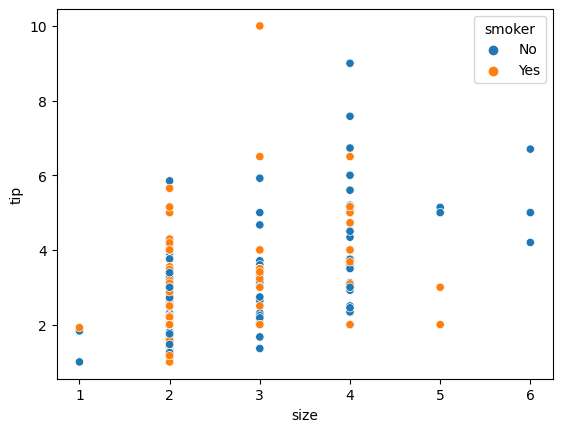

In [25]:
sns.scatterplot(x="size",y="tip",hue="smoker",data=df)

<Axes: xlabel='size', ylabel='tip'>

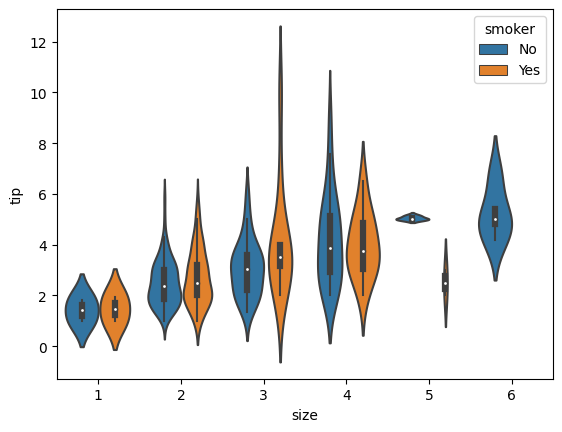

In [26]:
sns.violinplot(x="size",y="tip",hue="smoker",data=df)

<Axes: xlabel='size', ylabel='tip'>

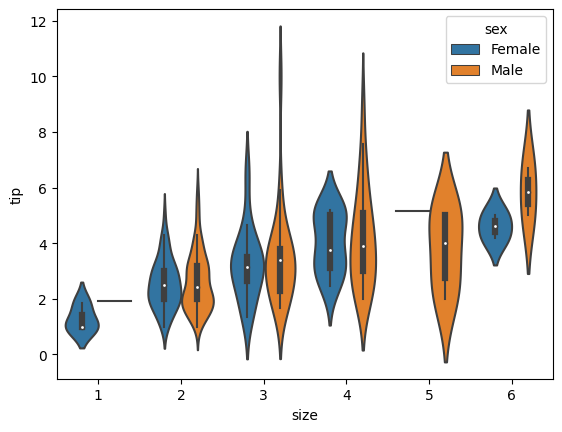

In [27]:
sns.violinplot(x="size",y="tip",hue="sex",data=df)

<Axes: xlabel='day', ylabel='tip'>

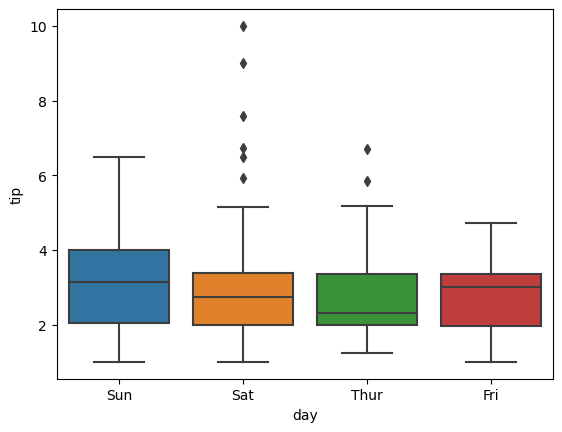

In [28]:
sns.boxplot(x="day",y="tip",data=df)

<Axes: xlabel='day', ylabel='tip'>

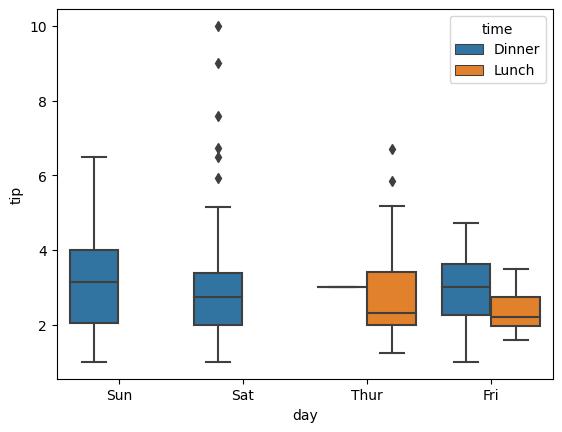

In [29]:
sns.boxplot(x="day",y="tip",hue = "time",data=df)

<Axes: xlabel='day', ylabel='tip'>

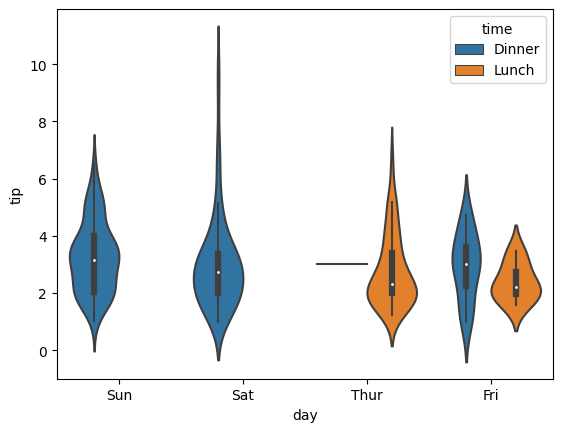

In [30]:
sns.violinplot(x="day",y="tip",hue = "time",data=df)

<Axes: xlabel='day', ylabel='tip'>

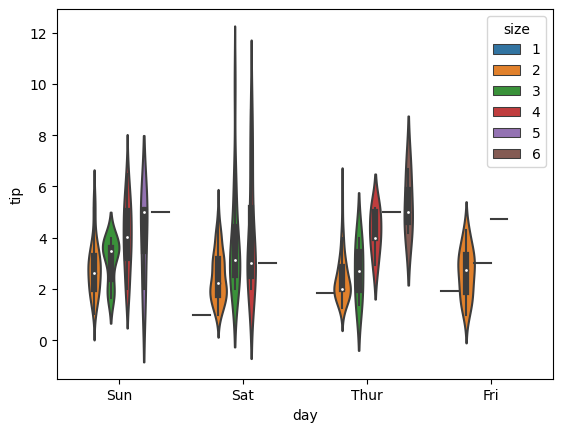

In [31]:
sns.violinplot(x="day",y="tip",hue = "size",data=df)

## Veri Setindeki kategorik deƒüi≈ükenleri modele uygun hale getiriyoruz

In [32]:
label_encoder = LabelEncoder()
# 'sex' s√ºtununu label encoding ile kodla (Male: 1, Female: 0)
df['sex'] = label_encoder.fit_transform(df['sex'])
# 'smoker', 'day' ve 'time' s√ºtunlarƒ±nƒ± one-hot encoding ile kodla
df = pd.get_dummies(df, columns=['smoker', 'day', 'time'])
print(df)


     total_bill   tip  sex  size  tip/total_bill  tip_percentage  smoker_No  \
0         16.99  1.01    0     2        0.059447        5.944673       True   
1         10.34  1.66    1     3        0.160542       16.054159       True   
2         21.01  3.50    1     3        0.166587       16.658734       True   
3         23.68  3.31    1     2        0.139780       13.978041       True   
4         24.59  3.61    0     4        0.146808       14.680765       True   
..          ...   ...  ...   ...             ...             ...        ...   
239       29.03  5.92    1     3        0.203927       20.392697       True   
240       27.18  2.00    0     2        0.073584        7.358352      False   
241       22.67  2.00    1     2        0.088222        8.822232      False   
242       17.82  1.75    1     2        0.098204        9.820426       True   
243       18.78  3.00    0     2        0.159744       15.974441       True   

     smoker_Yes  day_Fri  day_Sat  day_Sun  day_Thu

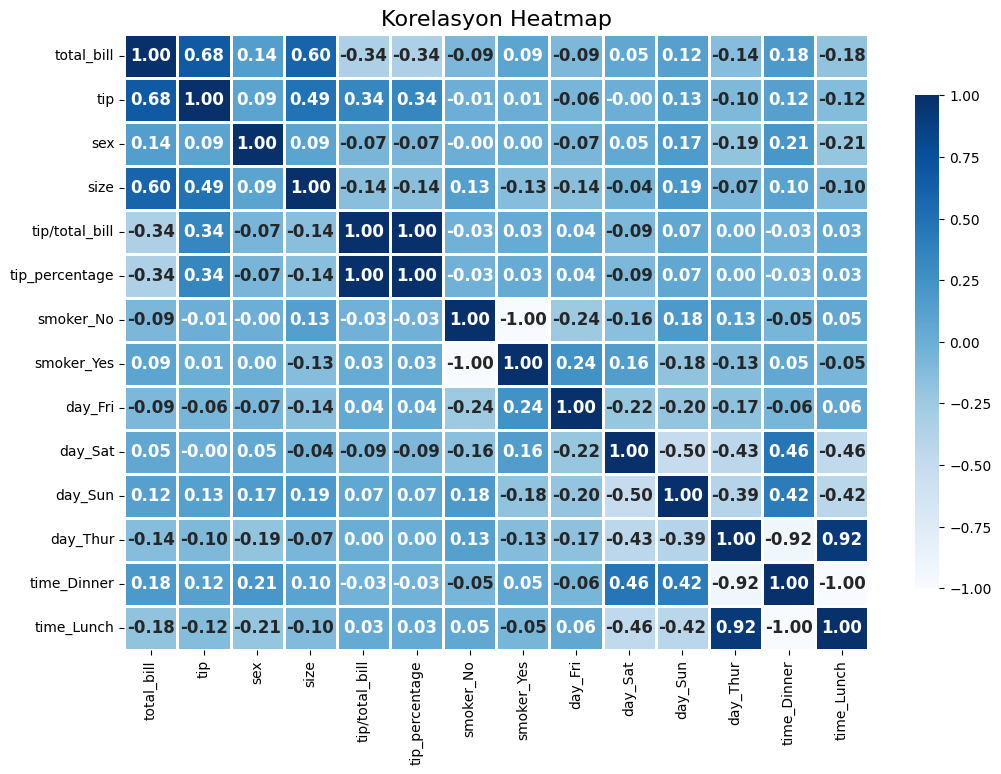

In [33]:
# Verilerin birbirisi ile olan korelasyonunu inceliyoruz
corr = df.corr()
plt.figure(figsize=(12, 8)) 
sns.heatmap(
    corr,
    cmap="Blues",
    linewidths=1,
    annot=True,
    annot_kws={"size": 12, "weight": 'bold'},  
    fmt=".2f", 
    cbar_kws={"shrink": 0.8}  
)
plt.title('Korelasyon Heatmap', fontsize=16)  
plt.show()

## Model i√ßin veri setindeki hedef deƒüerini ayƒ±rƒ±yoruz ve "total_bill/tip" tipten t√ºrettiƒüimiz i√ßin onu da kaldƒ±rƒ±yoruz

In [34]:
y = df['tip']
X = df.drop(columns=['tip','tip/total_bill','tip_percentage'])

# Veri setini %80 train %20 test olacak ≈üekilde ayƒ±rƒ±yoruz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression modelimizi kuruyoruz

In [35]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

## Linear Regression Modelinin MSE ve R^2 metriklerine g√∂re deƒüerline bakƒ±yoruz

In [36]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.7033566017436109
R^2 Score: 0.4373018194348246


## XGBoost modelini kurup onun da sonu√ß metriklerini inceliyoruz

In [37]:
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.7943331308794556
R^2 Score: 0.3645189276670223


## XGBoost modelinin √∂zelliklerinin √∂nem deƒüerlerini inceliyoruz

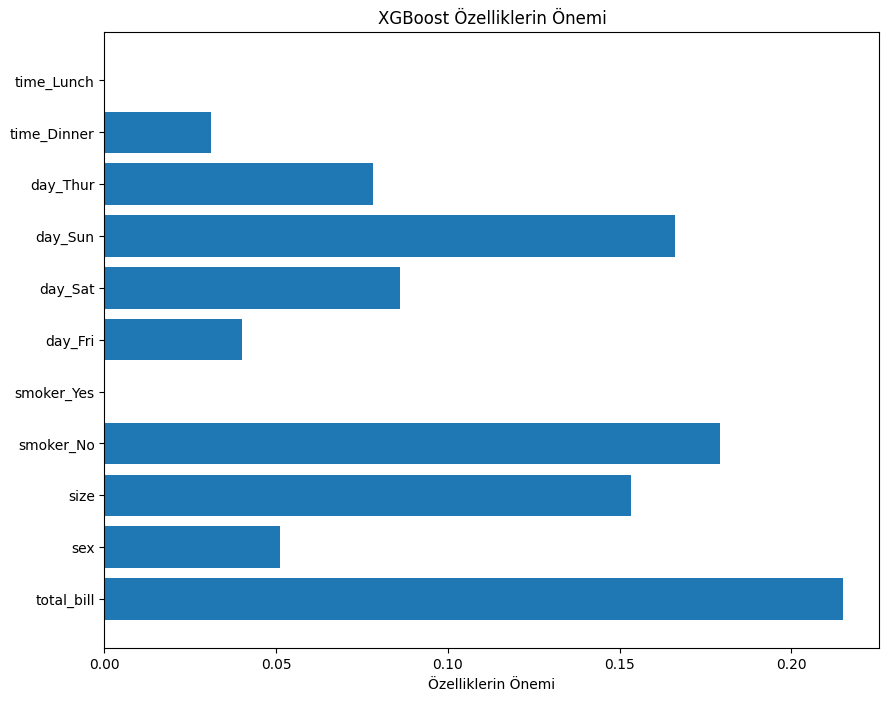

In [38]:
feature_importances = model.feature_importances_

plt.figure(figsize=(10, 8))
plt.barh(X.columns, feature_importances)
plt.xlabel('√ñzelliklerin √ñnemi')
plt.title('XGBoost √ñzelliklerin √ñnemi')
plt.show()

## Linear Regression'un √áapraz doƒürulama ile sonu√ß metriklerini inceliyoruz 

In [39]:
model = LinearRegression()

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')

mean_mse = -cv_scores.mean()  # cross_val_score negatif MSE d√∂ner, bu y√ºzden i≈üareti deƒüi≈ütiriyoruz
std_mse = cv_scores.std()
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE) - Average: {mean_mse}")
print(f"Standard Deviation of MSE: {std_mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error (MSE) - Average: 1.1091673727835532
Standard Deviation of MSE: 0.28626543420423667
R^2 Score: 0.3645189276670223


## En son bir de Ensemble learning (Topluluk √ñƒürenmesi) √∂rneƒüi ile √º√ß modeli kurup sonu√ßlarƒ± inceliyoruz

In [40]:

lin_reg = LinearRegression()
tree_reg = DecisionTreeRegressor(random_state=42)
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)

ensemble_model = VotingRegressor(estimators=[
    ('lr', lin_reg),
    ('dt', tree_reg),
    ('rf', forest_reg)
])

ensemble_model.fit(X_train, y_train)

y_pred = ensemble_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.7878521036961533
R^2 Score: 0.369703868272111


# üîç Veri ƒ∞ncelemesi ve G√∂zlemler


## Bu veri seti √ºzerinde yapƒ±lan analizler sonucunda elde edilen bazƒ± √∂nemli bulgular a≈üaƒüƒ±da √∂zetlenmi≈ütir:

### 1. üí∏ Bah≈üi≈ü (Tip) ve Toplam Hesap (Total Bill) ƒ∞li≈ükisi:
Korelasyon: Bah≈üi≈ü miktarƒ± ile toplam hesap arasƒ±nda pozitif bir korelasyon olduƒüu g√∂zlemlendi. Yani, toplam hesap arttƒ±k√ßa, m√º≈üterilerin bƒ±raktƒ±ƒüƒ± bah≈üi≈ü miktarƒ± da genellikle artmaktadƒ±r. Bu, m√º≈üteri davranƒ±≈ülarƒ±nda hesap tutarƒ±nƒ±n bah≈üi≈ü miktarƒ±nƒ± etkilediƒüine dair bir g√∂sterge olabilir. üìà
Grafiksel Analiz: Scatter plot ve regresyon √ßizgisi kullanƒ±larak, toplam hesap tutarƒ±nƒ±n daha y√ºksek olduƒüu durumlarda daha y√ºksek bah≈üi≈ülerin bƒ±rakƒ±ldƒ±ƒüƒ± doƒürulandƒ±. üìä
### 2. üöª Cinsiyet (Sex) ve Bah≈üi≈ü (Tip) ƒ∞li≈ükisi:
Ortalama Bah≈üi≈ü: Erkeklerin ortalama olarak daha y√ºksek bah≈üi≈ü bƒ±raktƒ±ƒüƒ± g√∂zlemlendi. Ancak bu farkƒ±n istatistiksel olarak anlamlƒ± olup olmadƒ±ƒüƒ±nƒ± belirlemek i√ßin daha ayrƒ±ntƒ±lƒ± bir istatistiksel test yapƒ±lmasƒ± gerekebilir. üë®‚Äçü¶∞üíµüë©‚Äçü¶∞
Grafiksel Analiz: Cinsiyet bazƒ±nda ortalama bah≈üi≈ü tutarlarƒ±nƒ± kar≈üƒ±la≈ütƒ±rmak i√ßin bar plot kullanƒ±ldƒ± ve erkeklerin genellikle daha y√ºksek bah≈üi≈ü bƒ±raktƒ±ƒüƒ± tespit edildi. üìâ
### 3. üìÖ G√ºn (Day) ve Bah≈üi≈ü ƒ∞li≈ükisi:
Hafta Sonu Etkisi: Hafta sonlarƒ± (Cumartesi ve Pazar), bah≈üi≈ülerin ortalama olarak daha y√ºksek olduƒüu g√ºnler olarak tespit edildi. Bu, hafta sonlarƒ± restoranlarƒ±n daha yoƒüun olmasƒ± ve daha b√ºy√ºk gruplarƒ±n yemek yemesiyle ilgili olabilir. üèñÔ∏è
G√ºn Bazƒ±nda ƒ∞nceleme: G√ºnlere g√∂re ortalama bah≈üi≈ü miktarlarƒ± kar≈üƒ±la≈ütƒ±rƒ±ldƒ± ve hafta sonu g√ºnlerinin √∂ne √ßƒ±ktƒ±ƒüƒ± g√∂zlemlendi. üìÜ
### 4. üçΩÔ∏è √ñƒü√ºn (Time) ve Bah≈üi≈ü ƒ∞li≈ükisi:
√ñƒülen ve Ak≈üam Yemeƒüi: Ak≈üam yemeklerinde genellikle daha y√ºksek bah≈üi≈ü bƒ±rakƒ±ldƒ±ƒüƒ± g√∂zlemlendi. Bunun muhtemel sebebi, ak≈üam yemeklerinin daha pahalƒ± ve daha uzun s√ºreli olmasƒ±dƒ±r. üåÜüç¥
√ñƒü√ºn Bazƒ±nda ƒ∞nceleme: √ñƒülen ve ak≈üam yemeklerinde bƒ±rakƒ±lan bah≈üi≈üler kar≈üƒ±la≈ütƒ±rƒ±ldƒ±ƒüƒ±nda, ak≈üam yemeklerinde ortalama bah≈üi≈ülerin daha y√ºksek olduƒüu g√∂r√ºld√º. üåá
### 5. üë• Grup B√ºy√ºkl√ºƒü√º (Size) ve Bah≈üi≈ü ƒ∞li≈ükisi:
Grup B√ºy√ºkl√ºƒü√º: Grup b√ºy√ºkl√ºƒü√º arttƒ±k√ßa bƒ±rakƒ±lan bah≈üi≈üin de arttƒ±ƒüƒ± g√∂zlemlendi. Ancak, ki≈üi ba≈üƒ±na d√º≈üen bah≈üi≈ü miktarƒ±nƒ±n grup b√ºy√ºkl√ºƒü√º arttƒ±k√ßa azaldƒ±ƒüƒ±na dair bir eƒüilim g√∂zlendi. üë®‚Äçüë©‚Äçüëß‚Äçüë¶üí∞
Grup Analizi: Farklƒ± grup b√ºy√ºkl√ºklerinde ortalama bah≈üi≈ü miktarlarƒ± incelendi ve b√ºy√ºk gruplarƒ±n toplamda daha fazla bah≈üi≈ü bƒ±raktƒ±ƒüƒ±, ancak ki≈üi ba≈üƒ±na d√º≈üen bah≈üi≈üin azaldƒ±ƒüƒ± g√∂zlemlendi. üìàüìâ